In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

import statsmodels.api as sm  # 로지스틱함수
import scipy.stats as spst  # 카이제곱검정

import warnings   
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

data=pd.read_csv('train.csv')

In [3]:
list(data)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [4]:
print('이 데이터 셋은 {} 개의 행과 {}개의 열을 가지고 있습니다.'.format(data.shape[0],data.shape[1]))
print('\n각 데이터 타입 개수\n',data.dtypes.value_counts())
isnull_series = data.isnull().sum()
print('\nnull 칼럼과 그 개수\n',isnull_series[isnull_series>0].sort_values(ascending = False))

이 데이터 셋은 1460 개의 행과 81개의 열을 가지고 있습니다.

각 데이터 타입 개수
 object     43
int64      35
float64     3
dtype: int64

null 칼럼과 그 개수
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### ① Target(saleprice)

In [6]:
var = 'SalePrice'

1. 변수의 비즈니스 의미 :집 값
2. 숫자형
3. NaN 없음

4) 기초통계량(수치화)

In [7]:
data[var].describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

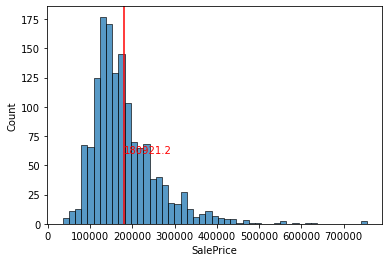

Skewness: 1.882876
Kurtosis: 6.536282


In [8]:
sns.histplot(x=var,data=data)
var_m = np.mean(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')
plt.show()
print("Skewness: %f" % data[var].skew()) 
print("Kurtosis: %f" % data[var].kurt())

- 왜도가 0보다 큰 값으로 왼쪽으로 치우친 분포
- 첨도가 0보다 큰 값으로 정규분포보다 뾰족한 형태
- 150000달러가 가장 많음
- 500000달러 이후로는 매우 극소수 존재

###### 참고
'''
- 첨도
첨도(kurtosis)는 정규분포 대비 봉오리의 높이를 알아보는 측도입니다.  
첨도가 '0'보다 크면 (β4 > 0) 정규분포보다 뾰족하다는 의미이며, 
첨도가 '0'보다 작으면 (β4 < 0) 정규분포보다 납작하다는 뜻으로 해석하면 되겠습니다.

- 왜도
왜도(skewness)는 자료의 대칭성을 알아보는 측도입니다.  
좌우 대칭형태를 띠는 정규분포는 왜도(β3) 점수가 '0' 이며, 
오른쪽으로 꼬리가 긴 분포 (right-skewed distribution)은 왜도 점수가 '0'보다 크며(β3 > 0), 
왼쪽으로 꼬리가 긴 분포(left-skewed distribution)은 왜도 점수가 '0'보다 작습니다((β3 < 0).  
'''


Text(185921.19589041095, 6e-06, '180921.2')

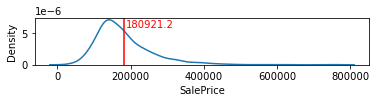

In [9]:
plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 5000, 6e-6, round(var_m, 2), color='r')

### ② feature1 (MSSubClass) 

In [10]:
var = 'MSSubClass'

1. 변수의 비즈니스 의미 : 판매와 관련된 주거 유형

2. 범주형
- 20 : 1층 1946년 이후 건설
- 30 : 1층 1945년 이전 건설
- 40 : 1층 다락방 ( 미완성)
- 45 : 1.5층 (미완성)
- 50 : 1.5층 (완성)
- 60 : 2층 1946년 이후 건설
- 70 : 2층 1945년 이전 건설
- 75 : 모든 시대의 2.5층
- 80 : split-level(짧은 계단 세트로 층이 나뉜 구조) or 다층
- 85 : split-foyer (일반적으로 바닥과 주요생활 층으로 이어지는 짧은 계단, 전면 진입로)
- 90 : 복층
- 120 : 1층 PUD - 1946년 이후 건설
- 150 : 1.5층 PUD - 모든 시대
- 160 : 2층 PUD - 1946년 이전 건설
- 180 : 다층 PUD - SOQN  INCL SPLIT LEV/FOYER /(내부/외부 계단)의 포함
- 190 : FAMILY CONVERSION (2세대 전환) - 모든 스타일 및 전 시대 


- 참고
> PUD (Planned Unit Development, 계획 단위 개발):  
> 명시된 토지 내에서 허용되는 토지 사용을 재정의하는 유연한 비유클리드 구역 장치 유형

3) NaN 없음

4) 기초통계량(수치화)

In [11]:
data[var].unique()

# 150 값 없음

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

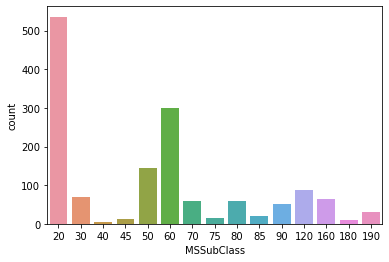

In [12]:
sns.countplot(data[var])

In [13]:
# sns.barplot(x=feature,y=target,data=data)
# plt.show()

- 20 > 60 > 120 순으로 크다.
- 40, 45, 75, 75, 180 은 상대적으로 적다.
- 1층의 비율이 2층의 비율보다 높다.

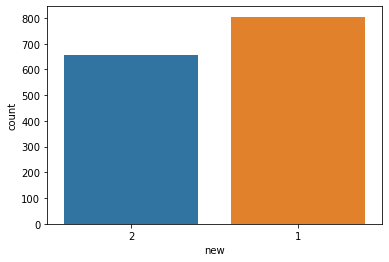

In [14]:
# 층별 구분 : MSSubClass
df = data.copy()

df['new'] = np.where(df['MSSubClass'].isin([20,30, 40, 50, 90]), '1', '2')
sns.countplot(df['new'])
plt.show()

In [15]:
# 범주별 빈도수
data[var].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [16]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

### ② feature2 (MSZoning) 

In [17]:
var = 'MSZoning'


1. 변수의 비즈니스 의미 : 판매와 관련된 주거 유형

2. 범주형 
- A 	  농업 
- C 	  상업 
- FV    수상 마을 주거  
- RH    주거용 (고밀도) 
- RL    주거용 (저밀도) 
- RP    주거용 (저밀도)의 공원 
- RM    주거용 (중밀도) 

3. nan값 없음


4) 기초통계량(수치화)

In [18]:
data[var].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [19]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

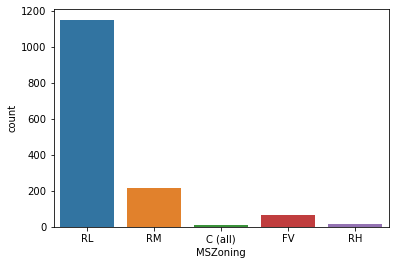

In [20]:
sns.countplot(data[var])

- 주거용(저밀도)이 압도적으로 높다.
- 주거용(중밀도) > 수상 마을이 그 다음으로 높다.
- 상업, 주거용(고밀도)가 그 다음으로 낮다.
- 농업, 주거용(저밀도)의 공원의 값은 없다.

### ② feature3 (LotFrontage) 

In [21]:
var = 'LotFrontage'

1. 변수의 비즈니스 의미 : Linear feet of street connected to property 
2. 수치형 
3. NaN값 있음 -> 최빈값으로 채움

In [22]:
# 최빈값으로 채움
fre_D = data['LotFrontage'].value_counts().idxmax()
data['LotFrontage'].fillna(fre_D, inplace=True)

4) 기초통계량(수치화)

In [23]:
data[var].describe() 

count    1460.000000
mean       68.267123
std        22.356355
min        21.000000
25%        60.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

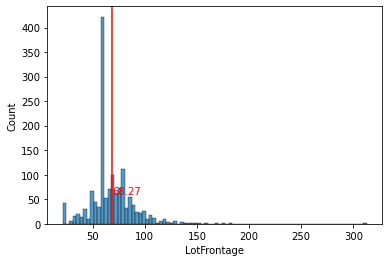

Skewness: 2.504092
Kurtosis: 21.172818


In [24]:
sns.histplot(x=var,data=data)
var_m = np.mean(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')
plt.show()
print("Skewness: %f" % data[var].skew()) 
print("Kurtosis: %f" % data[var].kurt())

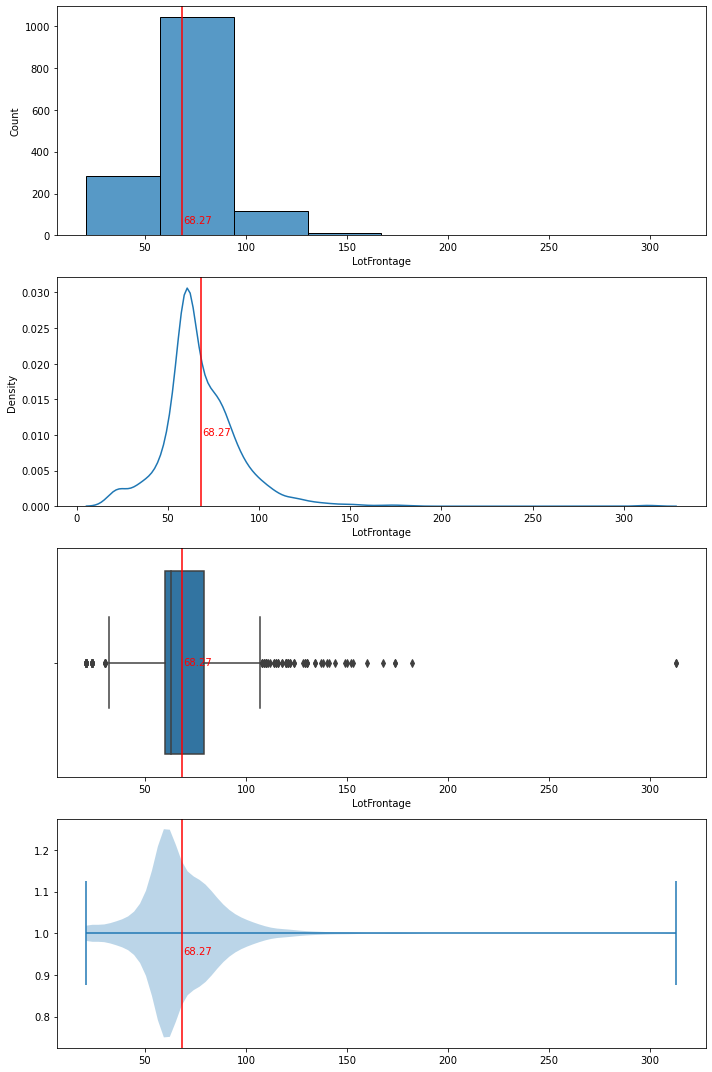

In [25]:
plt.figure(figsize = (10, 15))
var_m = np.mean(data[var])

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 8)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')
# plt.xlim(-5, 85)  # x축 제한

plt.subplot(4, 1, 3)
sns.boxplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')

plt.subplot(4, 1, 4)
plt.violinplot(data[var], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.95, round(var_m, 2), color='r')
# 밀도함수와 다른 점: 바이올린 플롯은 min, max부분에서 끝난다.
# 결측치가 존재하면 그래프가 그려지지 않는다.

plt.tight_layout()
plt.show()

In [26]:
# 이상치 제거
data = data[data['LotFrontage']<200]

- LotFrontage의 평균 : 68.27
- 60 즈음이 엄청나게 높다.
- 정규분포보다 뾰족하고 왼쪽으로 치우는 분포

### ② feature4 (LotArea) 

In [27]:
# 이상치 제거
data = data[data['LotArea']<100000]

In [28]:
var = 'LotArea'

1. 변수의 비즈니스 의미 : Lot size in square feet 
2. 수치형 
3. NaN값 없음

4) 기초통계량(수치화)

In [29]:
data[var].describe() 

count     1454.000000
mean     10047.440165
std       5454.098257
min       1300.000000
25%       7536.250000
50%       9458.500000
75%      11546.250000
max      70761.000000
Name: LotArea, dtype: float64

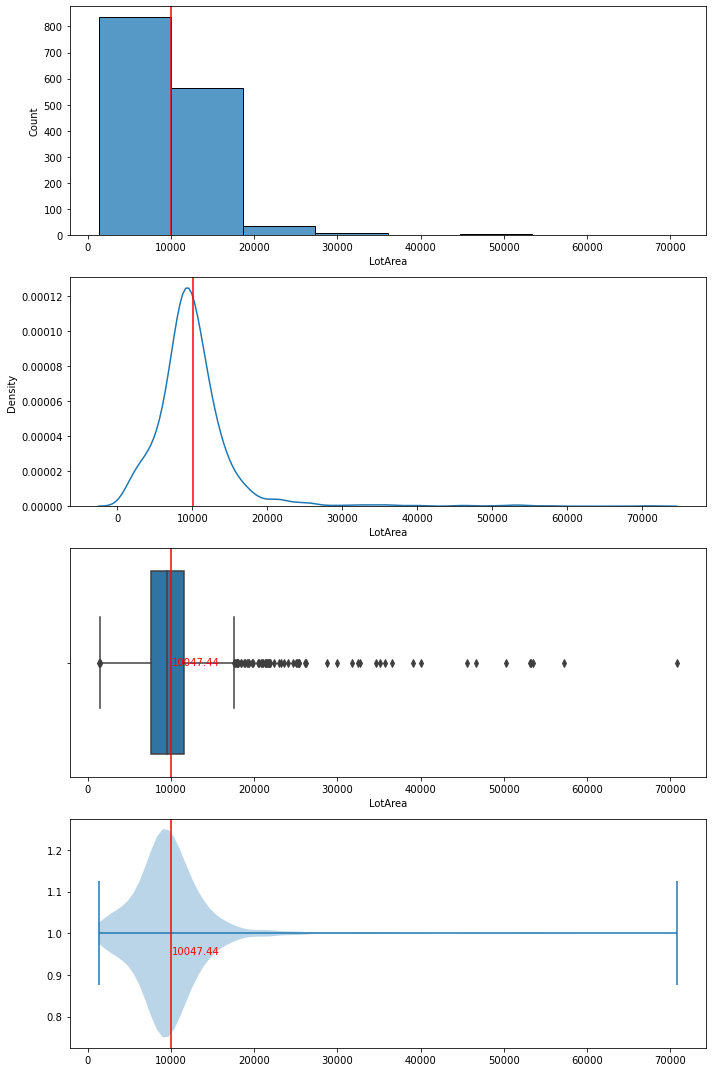

In [30]:
plt.figure(figsize = (10, 15))
var_m = np.mean(data[var])

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 8)
plt.axvline(var_m, color='red', linestyle='-')
# plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
# plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')
# plt.xlim(-5, 85)  # x축 제한

plt.subplot(4, 1, 3)
sns.boxplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')

plt.subplot(4, 1, 4)
plt.violinplot(data[var], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.95, round(var_m, 2), color='r')
# 밀도함수와 다른 점: 바이올린 플롯은 min, max부분에서 끝난다.
# 결측치가 존재하면 그래프가 그려지지 않는다.

plt.tight_layout()
plt.show()

- 땅 넓이 이상치 제거해야할까???
- 20000넘어가는 값 급격하게 감소
- 50000 넘어가는 값 거의 없음

### ② feature5 (Street) 

In [31]:
var = 'Street'

1. 변수의 비즈니스 의미 : 거리 상태
2. 범주형
- Grvl(비포장)
- Pave(포장) 
3. NaN값 없음



4) 기초통계량(수치화)

In [32]:
data[var].unique()

array(['Pave', 'Grvl'], dtype=object)

In [33]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Pave    0.996561
Grvl    0.003439
Name: Street, dtype: float64

<AxesSubplot:xlabel='Street', ylabel='count'>

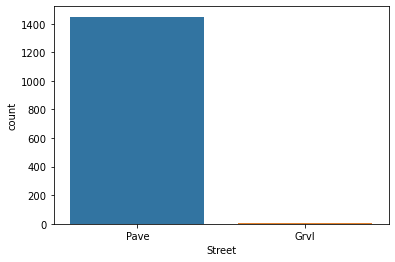

In [34]:
sns.countplot(data[var])

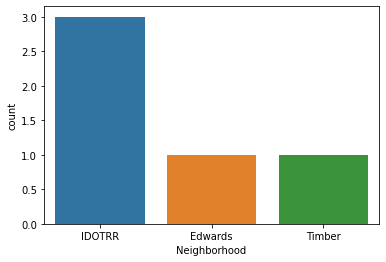

In [35]:
df = data.copy()

df = df[df['Street']=='Grvl']
sns.countplot(df['Neighborhood'])
plt.show()

- 거의 포장도로 -> 아마도 도시 위주
- 비포장된 지역이 세 곳으로 한정되어 있음 -> 이 곳은 자연 관광지 or 다른 이유
- edwards : 공군기지 

### ② feature6 (Alley) 

In [36]:
data=data.drop('Alley',axis=1)

var = 'Alley'

1. 변수의 비즈니스 의미 : 골목
2. 범주형
- Grvl(비포장)
- Pave(포장) 
3. NaN값 있음 -> 

4) 기초통계량

data[var].unique()

- 범주별 비율
data[var].value_counts() / data[var].shape[0]

sns.countplot(data[var])

df = data.copy()

df = df[df['Street']=='Grvl']
sns.countplot(df['Neighborhood'])
plt.show()

- street에서 Grvl인 곳은 골목도 Grvl
- street은 포장도로이지만 골목은 비포장인 경우 다수
- 포장과 비포장의 비율이 비슷

### ② feature7 (LotShape) 

In [37]:
var = 'LotShape'

1. 변수의 비즈니스 의미 : 택지의 모양
2. 범주형
- Reg	규칙적인	
- IR1	약간 불규칙
- IR2	적당히 불규칙
- IR3	불규칙
3. NaN값 없음

4) 기초통계량

In [38]:
data[var].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [39]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Reg    0.636176
IR1    0.332187
IR2    0.026135
IR3    0.005502
Name: LotShape, dtype: float64

<AxesSubplot:xlabel='LotShape', ylabel='count'>

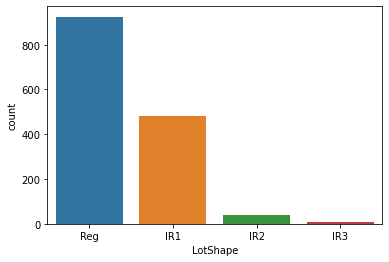

In [40]:
sns.countplot(data[var])

- 규칙적인게 압도적으로 많고 약간 불규칙이 그 다음이며, 나머지는 적은 수치이다.

### ② feature8 (LandContour) 

In [41]:
var = 'LandContour'

1. 변수의 비즈니스 의미 : 등고선
2. 범주형
- Lvl	:	    평지 ( flat level) 
- Bnk	: Banked     거리에서 건물로의 빠르고 상당한 경사 
- HLS   : Hillside  좌우로 상당한 경사 
- Low   : 낮은 고도
3. NaN값 없음

4) 기초통계량

In [42]:
data[var].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [43]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Lvl    0.901651
Bnk    0.042641
HLS    0.033012
Low    0.022696
Name: LandContour, dtype: float64

<AxesSubplot:xlabel='LandContour', ylabel='count'>

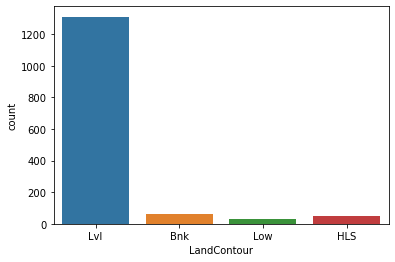

In [44]:
sns.countplot(data[var])

- 평지가 압도적으로 많다.
- 나머지는 비슷하게 낮은 수치 ( 경사가 있는 곳은 거의 산지일까..? )

### ② feature9 (Utilities) 

In [45]:
var = 'Utilities'

1. 변수의 비즈니스 의미 : 수도, 가스, 전기 시설 가능 여부
2. 범주형
- AllPub	: All public Utilities (E,G,W,& S)	
- NoSewr	: Electricity, Gas, and Water (Septic Tank)
- NoSeWa	: Electricity and Gas Only
- ELO	    : Electricity only	
3. NaN값 없음

4) 기초통계량

In [46]:
data[var].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [47]:
data[var].value_counts()

AllPub    1453
NoSeWa       1
Name: Utilities, dtype: int64

In [48]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

AllPub    0.999312
NoSeWa    0.000688
Name: Utilities, dtype: float64

<AxesSubplot:xlabel='Utilities', ylabel='count'>

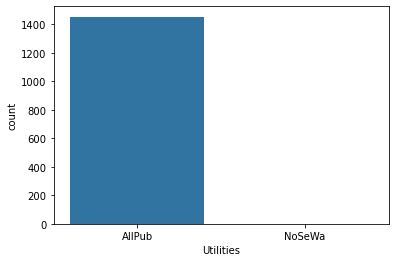

In [49]:
sns.countplot(data[var])

In [50]:
# df = data.copy()

# df = df[df['Utilities']=='NoSeWa']
# sns.countplot(df['Neighborhood'])
# plt.show()

- 수도, 가스, 전기 시설을 모두 갖춘 곳이 압도적이다.
- 전기와 가스 둘 중 하나만 갖춘 곳이 하나있다. -> 여기도 timber 있음 ( 여기 시골? )

### ② feature10 (LotConfig) 

In [51]:
var = 'LotConfig'

1. 변수의 비즈니스 의미 : 택지 구성
2. 범주형
- Inside	: 내부 구조
- Corner	: 코너에 위치
- CulDSac	: 막다른 길
- FR2	    : Frontage on 2 sides of property
- FR3	    : Frontage on 3 sides of property
3. NaN값 없음

4) 기초통계량

In [52]:
data[var].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [53]:
data[var].value_counts()

Inside     1050
Corner      261
CulDSac      92
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [54]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Inside     0.722146
Corner     0.179505
CulDSac    0.063274
FR2        0.032325
FR3        0.002751
Name: LotConfig, dtype: float64

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

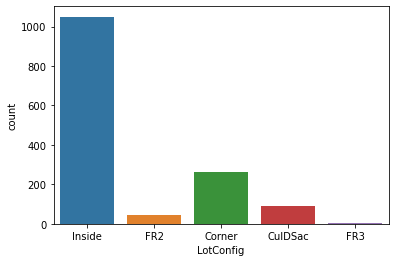

In [55]:
sns.countplot(data[var])

- inside 구조가 가장 많음
- FR3와 FR2가 가장 적음

### ② feature11 (LandSlope) 

In [56]:
var = 'LandSlope'

1. 변수의 비즈니스 의미 : 기울기
2. 범주형
- Gtl :	Gentle slope
- Mod :	Moderate Slope	
- Sev :	Severe Slope
3. NaN값 없음

4) 기초통계량

In [57]:
data[var].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [58]:
data[var].value_counts()

Gtl    1381
Mod      64
Sev       9
Name: LandSlope, dtype: int64

In [59]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Gtl    0.949794
Mod    0.044017
Sev    0.006190
Name: LandSlope, dtype: float64

<AxesSubplot:xlabel='LandSlope', ylabel='count'>

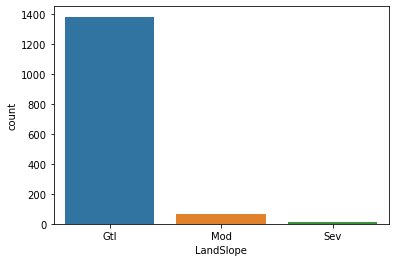

In [60]:
sns.countplot(data[var])

- 경사가 적은 곳이 가장 비율이 높음 -> 아까 평지가 가장 많은 것과 일맥상통

### ② feature12 (Neighborhood)

In [61]:
var = 'Neighborhood'

1. 변수의 비즈니스 의미 : 인접 도시
2. 범주형
- Bloomington Heights 일리노이 
- Bluestem 
- Briardale 브라이어데일 그린스 골프 코스 
- Brookside 컨트리 클럽 플라자 근방 
- Clear Creek 콜로라도의 카운티 
- College Creek 칼리지 강 
- Crawford 미국 조지아 주 오글 소프 카운티에있는 도시(2010년 인구조사 832명) 
- Edwards 캘리포니아주 모하비 사막에 있는 공군 기지 
- Gilbert 애리조나 주의 도시 
- Iowa DOT and Rail Road 아이오와주 교통부 
- Meadow Village 텍사스 샌안토니오 지역 
- Mitchell 사우스다코타 주 
- North Ames 에임스 - 아이오와의 도시(대학도시) 
- Northridge 캘리포니아 로스앤젤레스의 지역 
- Northpark Villa 워싱턴 시애틀의 아파트 
- Northridge Heights 네브래스카 링컨의 아파트 단지 
- Northwest Ames 에임스 - 아이오와의 도시(대학도시) 
- Old Town 캘리포니아 샌디에고의 지역 
- South & West of Iowa State University 아이오와 주립대학의 남서부 
- Sawyer 위스콘신의 카운티 (이 지역의 총 인구 수는 16,489명) 
- Sawyer West 위스콘신의 카운티 서쪽 
- Somerset 미국 매사추세츠 주 브리스톨 카운티의 마을 
- Stone Brook 뉴욕 주립대 
- Timberland 포틀랜드 
- Veenker 아이오와 에임스의 대중 골프장 
3. NaN값 없음

4) 기초통계량

In [62]:
data[var].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [63]:
data[var].value_counts()

NAmes      224
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      36
ClearCr     26
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [64]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

NAmes      0.154058
CollgCr    0.103164
OldTown    0.077717
Edwards    0.068088
Somerst    0.059147
Gilbert    0.054333
NridgHt    0.052957
Sawyer     0.050894
NWAmes     0.050206
SawyerW    0.040578
BrkSide    0.039890
Crawfor    0.035076
Mitchel    0.033700
NoRidge    0.028198
IDOTRR     0.025447
Timber     0.024759
ClearCr    0.017882
SWISU      0.017194
StoneBr    0.017194
MeadowV    0.011692
Blmngtn    0.011692
BrDale     0.011004
Veenker    0.007565
NPkVill    0.006190
Blueste    0.001376
Name: Neighborhood, dtype: float64

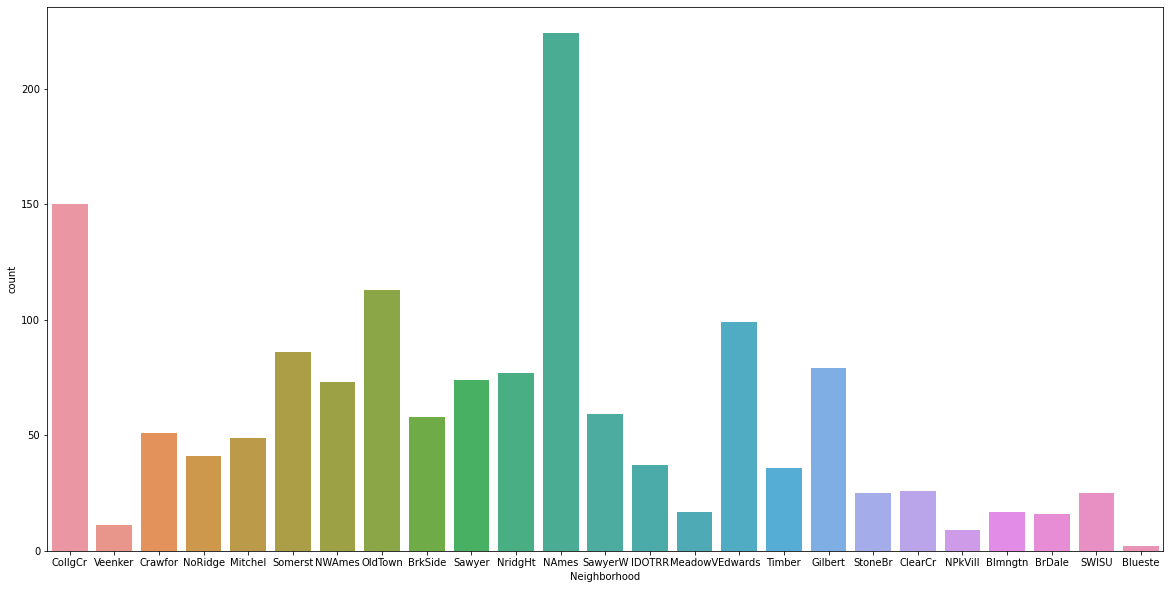

In [65]:
plt.figure(figsize=(20,10))
sns.countplot(data[var])
plt.show()

- 도시별로 뽑은 게 아니네! -> 부동산 거래 내역 같은 건가?
- 대도시, 대학 근처에 거래량이 많네!

### ② feature13 (Condition1)

In [66]:
var = 'Condition1'

1. 변수의 비즈니스 의미 : 다양한 조건들과의 근접성
2. 범주형
- Artery : Adjacent to arterial street (간선가로에 인접) 
- Feedr	 : Adjacent to feeder street (진입로에 인접) 
- Norm	 : Normal	 
- RRNn   : Within 200' of North-South Railroad (남북 철도에서 200내에)  
- RRAn   : Adjacent to North-South Railroad (남북 철도에 인접) 
- PosN   : Near positive off-site feature--park, greenbelt, etc. (공원, 그린벨트 등 가까이에 있는 긍정적 외부 장소) 
- PosA	 : Adjacent to postive off-site feature 
- RRNe	 : Within 200' of East-West Railroad (동서 철도에 200내에) 
- RRAe	 : Adjacent to East-West Railroad (동서 철도에 인접)   
3. NaN값 없음

4) 기초통계량

In [67]:
data[var].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [68]:
data[var].value_counts()

Norm      1256
Feedr       80
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         7
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [69]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Norm      0.863824
Feedr     0.055021
Artery    0.033012
RRAn      0.017882
PosN      0.013067
RRAe      0.007565
PosA      0.004814
RRNn      0.003439
RRNe      0.001376
Name: Condition1, dtype: float64

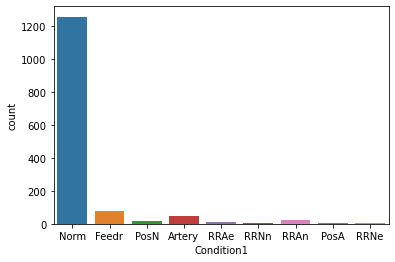

In [70]:
sns.countplot(data[var])
plt.show()

- Norm이 압도적으로 많음
- 진입로, 간선가로 근처가 그 다음으로 많음

### ② feature14 (Condition2)

In [71]:
var = 'Condition2'

1. 변수의 비즈니스 의미 : 다양한 조건들과의 근접성 ( 조건 둘 이상 )
- Condition1에서 추가적으로 있는 인접 시설
2. 범주형   
3. NaN값 없음

4) 기초통계량

In [72]:
data[var].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [73]:
data[var].value_counts()

Norm      1439
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

In [74]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Norm      0.989684
Feedr     0.004127
RRNn      0.001376
PosN      0.001376
Artery    0.001376
RRAe      0.000688
RRAn      0.000688
PosA      0.000688
Name: Condition2, dtype: float64

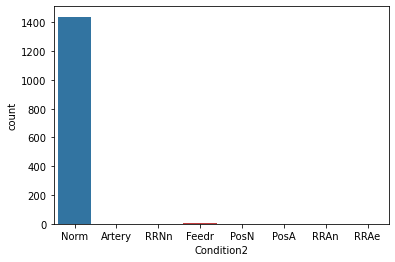

In [75]:
sns.countplot(data[var])
plt.show()

- 아마 특성이 하나만 있어 norm값이 나온 것이 아닐까?
- 나머지 값은 극소수
- condition 3를 만드는 게 좋을 듯! ( norm = norm 이면 norm값 출력 / 두 값이 다르면 '2'출력 )

### ② feature15 (BldgType)

In [76]:
var = 'BldgType'

1. 변수의 비즈니스 의미 : 주거 유형
2. 범주형   
- 1Fam	    : Single-family Detached	
- 2FmCon	: Two-family Conversion; originally built as one-family dwelling
- Duplx	    : Duplex
- TwnhsE	: Townhouse End Unit
- TwnhsI	: Townhouse Inside Unit
3. NaN값 없음

4) 기초통계량

In [77]:
data[var].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [78]:
data[var].value_counts()

1Fam      1215
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      30
Name: BldgType, dtype: int64

In [79]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

1Fam      0.835626
TwnhsE    0.078404
Duplex    0.035763
Twnhs     0.029574
2fmCon    0.020633
Name: BldgType, dtype: float64

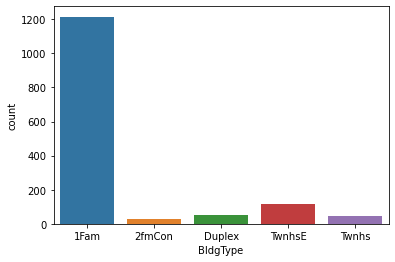

In [80]:
sns.countplot(data[var])
plt.show()

- 1Fam으로 한 가족의 집이 압도적으로 많다.
- 나머지 값은 극소수 

### ② feature16 (HouseStyle)

In [81]:
var = 'HouseStyle'

1. 변수의 비즈니스 의미 : 집 스타일
2. 범주형   
- 1Story	: 1층집 
- 1.5Fin	: 1.5층집: 2nd level finished  
- 1.5Unf	: 1.5층집: 2nd level unfinished 
- 2Story	: 2층집 
- 2.5Fin	: 2.5층집 :2nd level finished 
- 2.5Unf	: 2.5층집: 2nd level unfinished 
- SFoyer    : split foyer
- SLvl      : split level
3. NaN값 없음

4) 기초통계량

In [82]:
data[var].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [83]:
data[var].value_counts()

1Story    723
2Story    444
1.5Fin    152
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [84]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

1Story    0.497249
2Story    0.305365
1.5Fin    0.104539
SLvl      0.044704
SFoyer    0.025447
1.5Unf    0.009629
2.5Unf    0.007565
2.5Fin    0.005502
Name: HouseStyle, dtype: float64

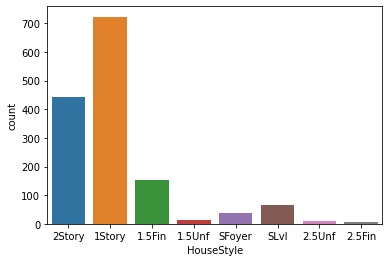

In [85]:
sns.countplot(data[var])
plt.show()

- 1층 > 2층 > 1.5층(완성) 순으로 많다.


In [86]:
list(data)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enclos

# 이변량 분석

In [87]:
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.012722,-0.026789,-0.005297,-0.031448,0.013581,-0.014365,-0.023918,-0.053263,-0.013410,...,-0.028673,-0.004015,0.002577,-0.046823,0.001093,0.048435,-0.004639,0.022733,0.000729,-0.018985
MSSubClass,0.012722,1.000000,-0.376124,-0.280195,0.035629,-0.060162,0.027971,0.043548,0.024635,-0.076166,...,-0.022473,-0.005565,-0.011981,-0.043975,-0.026062,0.008137,-0.010642,-0.014039,-0.021636,-0.083266
LotFrontage,-0.026789,-0.376124,1.000000,0.376192,0.230866,-0.066794,0.111703,0.081022,0.169279,0.127732,...,0.070209,0.122500,0.022441,0.065780,0.045615,0.103477,-0.011249,0.016509,-0.001731,0.353493
LotArea,-0.005297,-0.280195,0.376192,1.000000,0.165399,-0.020940,0.036456,0.028784,0.137479,0.213703,...,0.226229,0.149837,-0.002634,0.047490,0.102474,0.070882,0.031028,0.006538,-0.033511,0.367533
OverallQual,-0.031448,0.035629,0.230866,0.165399,1.000000,-0.091215,0.572412,0.550616,0.408541,0.229032,...,0.242414,0.304612,-0.113385,0.030789,0.065846,0.044590,-0.030487,0.074726,-0.027865,0.795392
OverallCond,0.013581,-0.060162,-0.066794,-0.020940,-0.091215,1.000000,-0.375650,0.072758,-0.128734,-0.044121,...,-0.002366,-0.031616,0.070822,0.025653,0.055157,0.002431,0.067765,-0.005892,0.044567,-0.078848
YearBuilt,-0.014365,0.027971,0.111703,0.036456,0.572412,-0.375650,1.000000,0.593842,0.315359,0.253235,...,0.226629,0.186586,-0.387628,0.031374,-0.050409,-0.005275,-0.033933,0.014562,-0.013756,0.526415
YearRemodAdd,-0.023918,0.043548,0.081022,0.028784,0.550616,0.072758,0.593842,1.000000,0.175769,0.127142,...,0.209821,0.224161,-0.193845,0.045551,-0.038430,-0.003435,-0.009967,0.022314,0.037091,0.509964
MasVnrArea,-0.053263,0.024635,0.169279,0.137479,0.408541,-0.128734,0.315359,0.175769,1.000000,0.247588,...,0.160107,0.115442,-0.109685,0.019385,0.062978,-0.020611,-0.030597,0.000390,-0.006722,0.481935
BsmtFinSF1,-0.013410,-0.076166,0.127732,0.213703,0.229032,-0.044121,0.253235,0.127142,0.247588,1.000000,...,0.201528,0.088978,-0.103154,0.029256,0.068575,0.052933,0.002624,-0.000760,0.013675,0.403791


### MSSubClass --> target *

In [88]:
target = 'SalePrice'

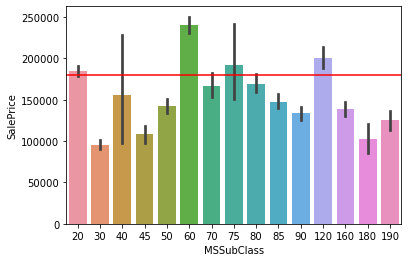

In [89]:
feature = 'MSSubClass'
# 시각화
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

In [90]:
data[feature].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [91]:
# 수치화
m20 = data.loc[data.MSSubClass == 20, target]
m30 = data.loc[data.MSSubClass == 30, target]
m40 = data.loc[data.MSSubClass == 40, target]
m45 = data.loc[data.MSSubClass == 45, target]
m50 = data.loc[data.MSSubClass == 50, target]
m60 = data.loc[data.MSSubClass == 60, target]
m70 = data.loc[data.MSSubClass == 70, target]
m75 = data.loc[data.MSSubClass == 75, target]
m80 = data.loc[data.MSSubClass == 80, target]
m85 = data.loc[data.MSSubClass == 85, target]
m90 = data.loc[data.MSSubClass == 90, target]
m120 = data.loc[data.MSSubClass == 120, target]
m160 = data.loc[data.MSSubClass == 160, target]
m180 = data.loc[data.MSSubClass == 180, target]
m190 = data.loc[data.MSSubClass == 190, target]


spst.f_oneway(m20,m30,m40,m45,m50,m60,m70,m75,m80,m85,m90,m120,m160,m180,m190)

F_onewayResult(statistic=34.31526265359553, pvalue=4.831010699147842e-80)

#### 추가분석 _인사이트

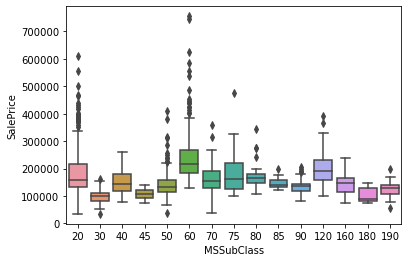

In [92]:
x = 'MSSubClass'
sns.boxplot(x=x,y=target,data=data)
plt.show()

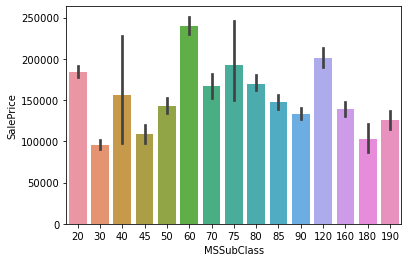

In [93]:
sns.barplot(x=x,y=target,data=data)
plt.show()

- 60(2층 1946년 이후 건설)의 가격대가 평균적으로 가장 높으며 이상치도 많다.
- 20(1층 1946년 이후 건설)과 120(1층 PUD - 1946년 이후 건설)은 평균이 높다.
- 45(1.5층 (미완성) ) 와 85(split-levle/다층) / 180(다층)은 이상치가 적다. -> 정해진 가격대가 있는건가?
- 전반적으로 1층집의 가격대가 높다. -> 집 전체로 거래되는 것이 아닌 2층집 이상이면 다가구라 구분되어 거래되나?

#### 추가분석 _새 기준 (개선)

In [94]:
data['MSSubClass']

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1454, dtype: int64

In [95]:
# 층별 구분 (f1 =1층 / f2 = 2층이상)

# 수치화
f1 = data.loc[data['MSSubClass'].isin([20,30,40,50,90]), target]
f2 = data.loc[data['MSSubClass'].isin([45,60,70,75,80,85,120,160,180,190]), target]


spst.ttest_ind(f1,f2)

#발표

Ttest_indResult(statistic=-7.971879897329433, pvalue=3.1376069235225742e-15)

> 층별로 구분했을 때는 이전보다 p-value 하락 / 상관계수 증가 -> 구분 전이 낫다는 결론

In [96]:
# 집값에 영향을 줄 요인 별로 묶어 구분
# new = 1946년 이후 건설 , older = 1945년 이전 , 
# split = 엇층, 엇계단, unf = 미완성 , other = 나머지

# 층별 구분 (f1 =1층 / f2 = 2층이상)

# 수치화
new = data.loc[data['MSSubClass'].isin([20,60,120]), target]
older = data.loc[data['MSSubClass'].isin([30,70,160]), target]
unf =data.loc[data['MSSubClass'].isin([40,45]), target]
split =data.loc[data['MSSubClass'].isin([80,85,180]), target]
other=data.loc[data['MSSubClass'].isin([50,75,90,150,190]), target]

spst.f_oneway(new,older,unf,split,other)


F_onewayResult(statistic=67.13331297063768, pvalue=3.657714373509327e-52)

> 집값에 영향을 주는 요인로 구분했을 때는 이전보다 p-value 약간하락 / 상관계수 증가 -> 구분 후가 낫다는 결론이지만 상의 예정

#### 전처리_ 새 열 추가

In [97]:
# 전처리_새 열 생성
data['MSSubClass'].loc[data['MSSubClass'].isin([20,60,120])] = 'new' 
data['MSSubClass'].loc[data['MSSubClass'].isin([30,70,160])] = 'older' 
data['MSSubClass'].loc[data['MSSubClass'].isin([40,45])] = 'unf' 
data['MSSubClass'].loc[data['MSSubClass'].isin([80,85,180])] = 'split' 
data['MSSubClass'].loc[data['MSSubClass'].isin([50,75,90,150,190])] = 'other' 

# 집값에 영향을 줄 요인 별로 묶어 구분
# new = 1946년 이후 건설 , older = 1945년 이전 , 
# split = 엇층, 엇계단, unf = 미완성 , other = 나머지


In [98]:
data['MSSubClass'].unique()

array(['new', 'older', 'other', 'unf', 'split'], dtype=object)

### MSZoning --> target *

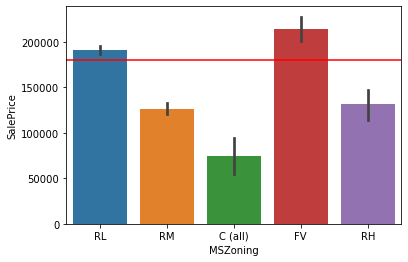

In [99]:
feature = 'MSZoning'
# 시각화
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

In [100]:
data[feature].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [101]:
# 수치화
RL = data.loc[data.MSZoning == 'RL', target]
RM = data.loc[data.MSZoning == 'RM', target]
C = data.loc[data.MSZoning == 'C (all)', target]
FV = data.loc[data.MSZoning == 'FV', target]
RH = data.loc[data.MSZoning == 'RH', target]

spst.f_oneway(RL,RM,C,FV,RH)

F_onewayResult(statistic=43.5535613963687, pvalue=1.4895017443905424e-34)

#### 추가분석_인사이트

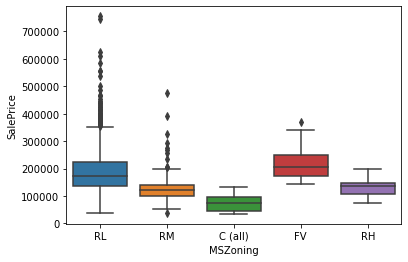

In [102]:
x = 'MSZoning'
sns.boxplot(x=x,y=target,data=data)
plt.show()

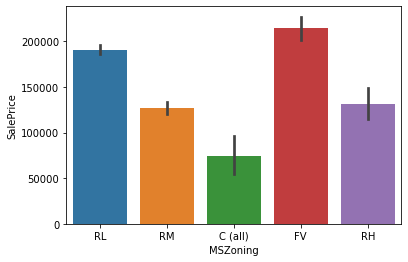

In [103]:
sns.barplot(x=x,y=target,data=data)
plt.show()

- 수상 주거 마을과 주거용(저밀도)의 집 값이 가장 높고 그 다음으로 주거용(중밀도), 주거용(저밀도)의 집값의 평균이 높다. 그 다음이 상업이다.
- 데이터 불균형이 너무 심해서 이걸로 인사이트를 뽑는 게 의미가 있을까?

### LotFrontage --> target *

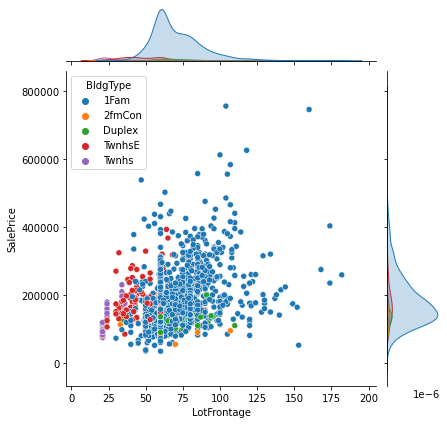

In [104]:
#  LotFrontage -> 타겟

x='LotFrontage'
target='SalePrice'
sns.jointplot(x=x,y=target,data=data,hue='BldgType')

In [105]:
import scipy.stats as spst
print(spst.pearsonr(data[x],data[target]))

(0.3534930026215304, 4.826870931579455e-44)


- lotranotage와target은 중간 상관관계를 지님
- 두 변수간 상관관계가 존재
- 집가격 : 집을 혼자 쓰는 경우 > 2가족 이상이 한 집을 쓰는 경우

### LotArea --> target *

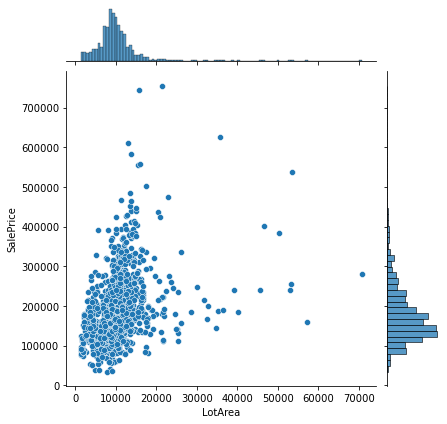

In [106]:
#  LotFrontage -> 타겟

x='LotArea'
target='SalePrice'
sns.jointplot(x=x,y=target,data=data)

In [107]:
import scipy.stats as spst
print(spst.pearsonr(data[x],data[target]))

(0.36753261524132663, 9.957377062206149e-48)


### Street --> Target

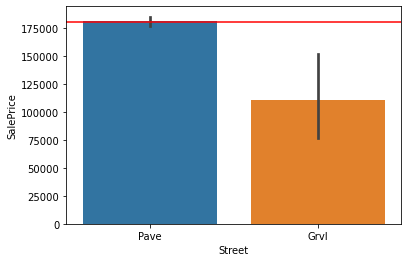

In [108]:
feature = 'Street'
# 시각화
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

In [109]:
data['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [110]:
# 수치화
pv = data.loc[data.Street == 'Pave', target]
gr = data.loc[data.Street == 'Grvl', target]


# spst.ttest_ind(pv,gr)
spst.ttest_ind(pv,gr)

Ttest_indResult(statistic=1.9828856699205393, pvalue=0.04756837680753977)

### LotShape --> Target *

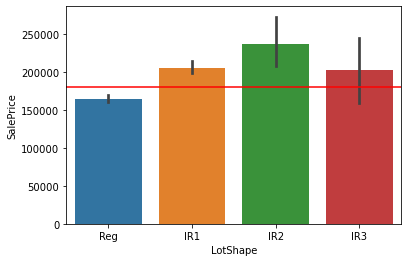

In [111]:
feature = 'LotShape'
# 시각화
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

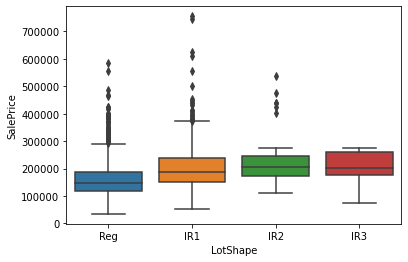

In [112]:
x = 'LotShape'
sns.boxplot(x=x,y=target,data=data)
plt.show()

In [113]:
data[feature].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [114]:
# 수치화
rg = data.loc[data.LotShape == 'Reg', target]
ir1 = data.loc[data.LotShape == 'IR1', target]
ir2 = data.loc[data.LotShape == 'IR2', target]
ir3 = data.loc[data.LotShape == 'IR3', target]

spst.f_oneway(rg,ir1,ir2,ir3)

F_onewayResult(statistic=38.28572889467891, pvalue=8.261445802492333e-24)

#### 추가분석_새기준(개선?)

In [115]:
# 모양을 규칙적 / 불규칙적으로 구분

# 수치화
rg = data.loc[data.LotShape == 'Reg', target]
ir = data.loc[data['LotShape'].isin(['IR1','IR2','IR3']), target]



spst.ttest_ind(rg,ir)


Ttest_indResult(statistic=-10.425671242321854, pvalue=1.3629446564575985e-24)

> 모양을 규칙적 / 불규칙적으로 구분하니 이전보다 상관계수는 높아지고 p-value는 낮아지는 결과 얻음

#### 전처리_새 열 추가

In [116]:
# 전처리_새 열 생성
data['LotShape'].loc[data.LotShape == 'Reg'] = 'reg' 
data['LotShape'].loc[data['LotShape'].isin(['IR1','IR2','IR3'])] = 'ir'

# reg: 모양을 규칙적 
# ir: 불규칙적으로 구분

In [117]:
data['LotShape'].unique()

array(['reg', 'ir'], dtype=object)

### LandContour --> Target *

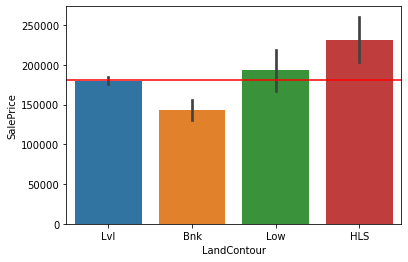

In [118]:
feature = 'LandContour'
# 시각화
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

In [119]:
data[feature].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [120]:
# 수치화
L1 = data.loc[data.LandContour == 'Lvl', target]
B = data.loc[data.LandContour == 'Bnk', target]
L = data.loc[data.LandContour == 'Low', target]
H = data.loc[data.LandContour == 'HLS', target]

spst.f_oneway(L1,B,L,H)

F_onewayResult(statistic=11.79263343708571, pvalue=1.239027909654769e-07)

In [121]:
data['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

#### 추가분석_새기준(개선 실패)

In [177]:
# 모양을 평지 / 기울기 있는 대지로 구분

# 수치화
flat = data.loc[data.LandContour == 'Lvl', target]
steep = data.loc[data['LandContour'].isin(['Bnk','Low','HLS']), target]


spst.ttest_ind(flat,steep)

Ttest_indResult(statistic=-0.5733791001923974, pvalue=0.5664768279729698)

> 이전보다 별로라 원래 기준 적용

### Utilities --> Target 

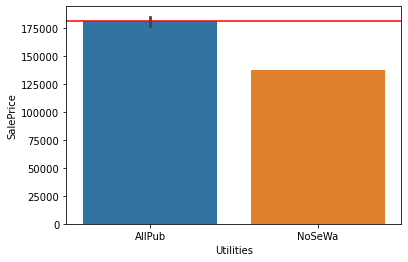

In [170]:
feature = 'Utilities'
# 시각화
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

In [174]:
data[feature].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [176]:
# 수치화
a1 = data.loc[data.Utilities == 'AllPub', target]
a2 = data.loc[data.Utilities == 'NoSeWa', target]


spst.ttest_ind(a1,a2)

Ttest_indResult(statistic=nan, pvalue=nan)

### LotConfig --> Target *

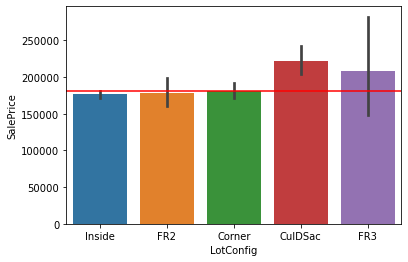

In [126]:
feature = 'LotConfig'
# 시각화
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

In [127]:
data[feature].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [128]:
# 수치화
Inside = data.loc[data.LotConfig == 'Inside', target]
FR2 = data.loc[data.LotConfig == 'FR2', target]
Corner = data.loc[data.LotConfig == 'Corner', target]
CulDSac = data.loc[data.LotConfig == 'CulDSac', target]
FR3 = data.loc[data.LotConfig == 'FR3', target]

spst.f_oneway(Inside,FR2,Corner,CulDSac,FR3)

F_onewayResult(statistic=7.30628763282184, pvalue=7.986434809623483e-06)

### LandSlope --> Target

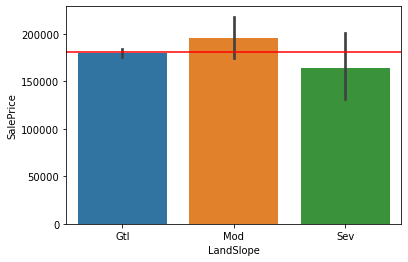

In [129]:
feature = 'LandSlope'
# 시각화
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

In [130]:
data[feature].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [131]:
# 수치화
Gtl = data.loc[data.LandSlope == 'Gtl', target]
Mod = data.loc[data.LandSlope == 'Mod', target]
Sev = data.loc[data.LandSlope == 'Sev', target]


spst.f_oneway(Gtl,Mod,Sev)

F_onewayResult(statistic=1.4574621612102103, pvalue=0.23316704154191903)

#### 추가분석_새기준(개선)

In [132]:
# 경사 유무로 구분
# gtl  = 경사 무 / ste = 경사 유

# 수치화
Gtl = data.loc[data.LandSlope == 'Gtl', target]
ste = data.loc[data['LandSlope'].isin(['Sev','Mod']), target]


spst.ttest_ind(Gtl,ste)

Ttest_indResult(statistic=-1.2684689526268111, pvalue=0.20483385930237674)

> 새 기준이 더 유의미

#### 전처리_새 열 추가

In [133]:
# 전처리_새 열 생성
data['LandSlope'].loc[data.LotShape == 'Gtl'] = 'Gtl' 
data['LandSlope'].loc[data['LandSlope'].isin(['Sev','Mod'])] = 'ste'

# Gtl: 경사 무 (평지)
# ste: 경사 유

In [134]:
data['LandSlope'].unique()

array(['Gtl', 'ste'], dtype=object)

### Neighborhood --> Target *

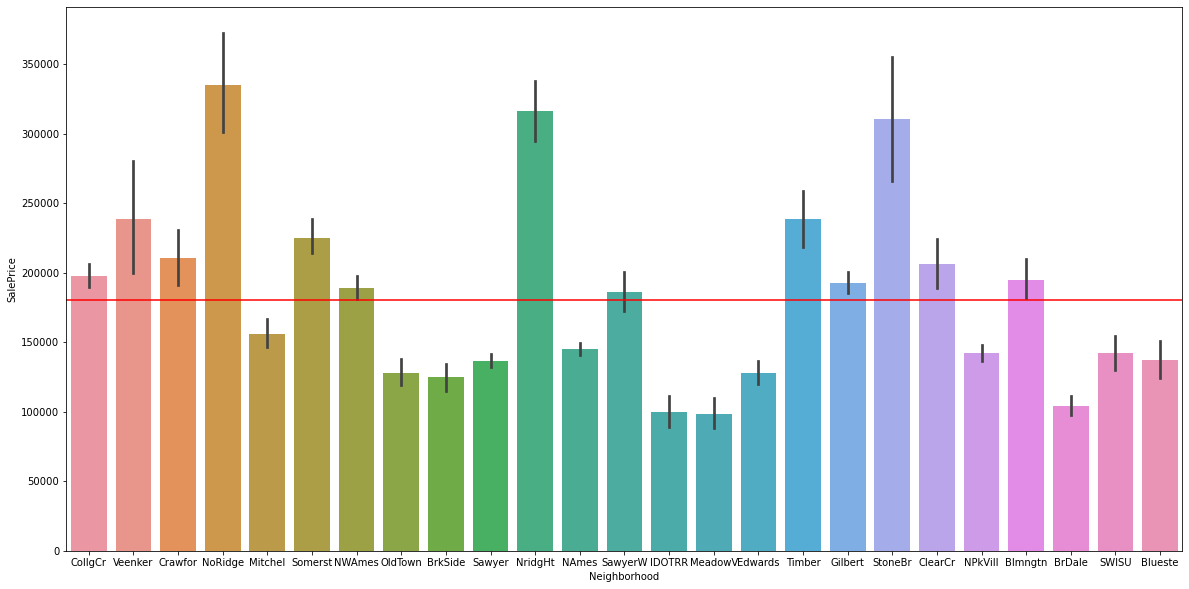

In [135]:
feature = 'Neighborhood'
# 시각화
plt.figure(figsize=(20,10))
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

In [136]:
data[feature].unique()


array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [137]:
# 수치화
CollgCr = data.loc[data.Neighborhood == 'CollgCr', target]
Veenker = data.loc[data.Neighborhood == 'Veenker', target]
Crawfor = data.loc[data.Neighborhood == 'Crawfor', target]
NoRidge = data.loc[data.Neighborhood == 'NoRidge', target]
Mitchel = data.loc[data.Neighborhood == 'Mitchel', target]
Somerst = data.loc[data.Neighborhood == 'Somerst', target]

NWAmes = data.loc[data.Neighborhood == 'NWAmes', target]
OldTown = data.loc[data.Neighborhood == 'OldTown', target]
BrkSide = data.loc[data.Neighborhood == 'BrkSide', target]
Sawyer = data.loc[data.Neighborhood == 'Sawyer', target]
NridgHt = data.loc[data.Neighborhood == 'NridgHt', target]
NAmes = data.loc[data.Neighborhood == 'NAmes', target]

SawyerW = data.loc[data.Neighborhood == 'SawyerW', target]
IDOTRR = data.loc[data.Neighborhood == 'IDOTRR', target]
MeadowV = data.loc[data.Neighborhood == 'MeadowV', target]
Edwards = data.loc[data.Neighborhood == 'Edwards', target]
Timber = data.loc[data.Neighborhood == 'Timber', target]
Gilbert = data.loc[data.Neighborhood == 'Gilbert', target]

StoneBr = data.loc[data.Neighborhood == 'StoneBr', target]
ClearCr = data.loc[data.Neighborhood == 'ClearCr', target]
NPkVill = data.loc[data.Neighborhood == 'NPkVill', target]
Blmngtn = data.loc[data.Neighborhood == 'Blmngtn', target]
BrDale = data.loc[data.Neighborhood == 'BrDale', target]
SWISU = data.loc[data.Neighborhood == 'SWISU', target]
Blueste = data.loc[data.Neighborhood == 'Blueste', target]



spst.f_oneway(CollgCr, Veenker, Crawfor, NoRidge, Mitchel, Somerst,
       NWAmes, OldTown, BrkSide, Sawyer, NridgHt, NAmes,
       SawyerW, IDOTRR, MeadowV, Edwards, Timber, Gilbert,
       StoneBr, ClearCr, NPkVill, Blmngtn, BrDale, SWISU,
       Blueste)

F_onewayResult(statistic=71.81904101270077, pvalue=2.6294321392882095e-225)

#### 추가분석_인사이트

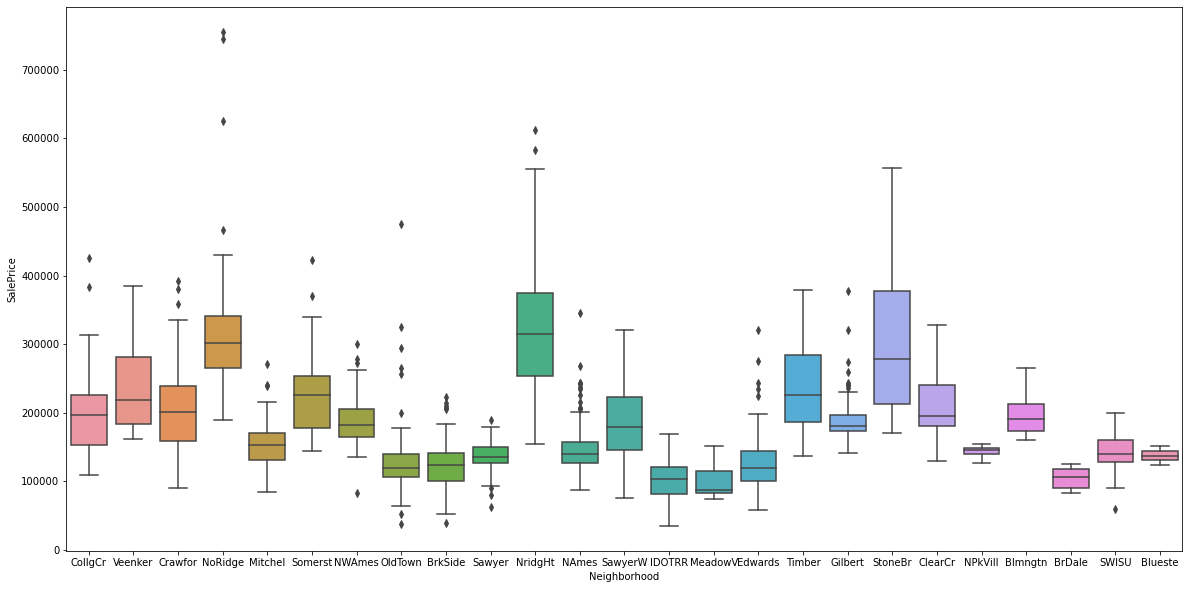

In [138]:
x = 'Neighborhood'
plt.figure(figsize=(20,10))
sns.boxplot(x=x,y=target,data=data)
plt.show()

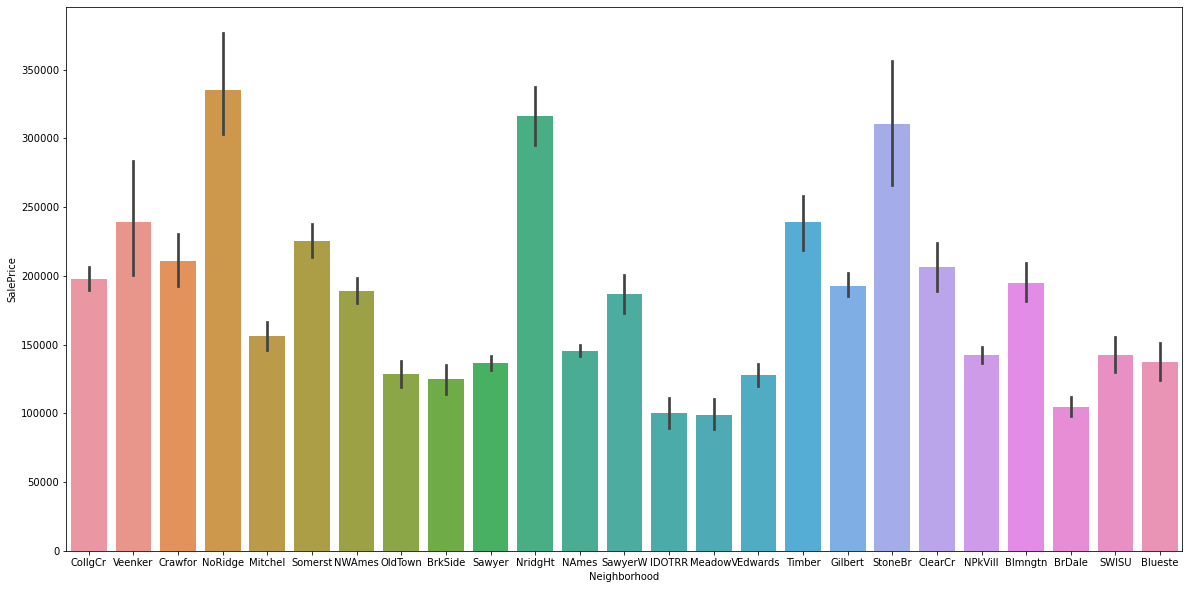

In [139]:
plt.figure(figsize=(20,10))
sns.barplot(x=x,y=target,data=data)
plt.show()

- 노스리지, 네브래스카 링컨의 아파트 단지(NridgHt), Stone Brook(뉴욕 주립대) 둘 다 학벌 관련된 곳의 집값이 높다. 노스리지의 경우 학군으로 유명해서 집값이 높은 곳으로 추정
-   Old Town 캘리포니아 샌디에고의 지역 , Sawyer 위스콘신의 카운티 (이 지역의 총 인구 수는 16,489명) , Brookside 컨트리 클럽 플라자 근방의 집값이 낮음.  
- 워싱턴 시애틀의 아파트(NPKVill)의 폭은 좁은데 이유가 뭘까? -> 거래데이터 자체가 적어서 

### Condition1 --> Target *

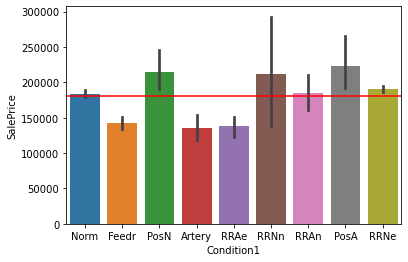

In [140]:
feature = 'Condition1'
# 시각화
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

In [141]:
data[feature].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [142]:
# 수치화
Norm = data.loc[data.Condition1 == 'Norm', target]
Feedr = data.loc[data.Condition1 == 'Feedr', target]
PosN = data.loc[data.Condition1 == 'PosN', target]
Artery = data.loc[data.Condition1 == 'Artery', target]
RRAe = data.loc[data.Condition1 == 'RRAe', target]
RRNn = data.loc[data.Condition1 == 'RRNn', target]
RRAn = data.loc[data.Condition1 == 'RRAn', target]
PosA = data.loc[data.Condition1 == 'PosA', target]
RRNe = data.loc[data.Condition1 == 'RRNe', target]


spst.f_oneway(Norm,Feedr,PosN,Artery,RRAe,RRNn,RRAn,PosA,RRNe)

F_onewayResult(statistic=5.996034783341746, pvalue=1.3518345854788594e-07)

#### 추가분석_새기준(개선)

In [143]:
# norm = 일반적
# other = 그 외 특별한 기준

# 수치화
Norm = data.loc[data.Condition1 == 'Norm', target]
other = data.loc[data['Condition1'].isin(['Feedr','PosN','Artery','RRAe','RRNn','RRAn','PosA','RRNe']),  target]

spst.ttest_ind(Norm,other)

Ttest_indResult(statistic=4.341497561381617, pvalue=1.5131719925499023e-05)

In [144]:
# norm = 일반적
# other = 그 외 특별한 기준

# 수치화 : 3개 ( 긍  / 부 / 평)
Norm = data.loc[data.Condition1 == 'Norm', target]
pos = data.loc[data['Condition1'].isin(['PosN','PosA']),  target]
nat = data.loc[data['Condition1'].isin(['Feedr','Artery','RRAe','RRNn','RRAn','RRNe']),  target]

spst.f_oneway(Norm,pos,nat)

F_onewayResult(statistic=18.142117934193948, pvalue=1.6515017441916125e-08)

In [145]:
# norm = 일반적 + 긍정
# other = 그 외 특별한 기준

# 수치화 : 2개 ( 긍,평 / 부)
norm = data.loc[data['Condition1'].isin(['Norm','PosN','PosA']),  target]
nat = data.loc[data['Condition1'].isin(['Feedr','Artery','RRAe','RRNn','RRAn','RRNe']),  target]

spst.ttest_ind(Norm,nat)

Ttest_indResult(statistic=5.498232784404755, pvalue=4.539482274942506e-08)

> 상의 필요

#### 전처리_새 열 추가

In [146]:
# 전처리_새 열 생성
data['Condition1'].loc[data.LotShape == 'Norm'] = 'Norm' 
data['Condition1'].loc[data['Condition1'].isin(['PosN','PosA'])] = 'pos'
data['Condition1'].loc[data['Condition1'].isin(['Feedr','Artery','RRAe','RRNn','RRAn','RRNe'])] = 'nag'

# Norm : norm 일반적 
# pos  : 긍정적 주변 환경
# nag  : 부정적 주변 환경

In [147]:
data['Condition1'].unique()

array(['Norm', 'nag', 'pos'], dtype=object)

### Condition2 --> Target

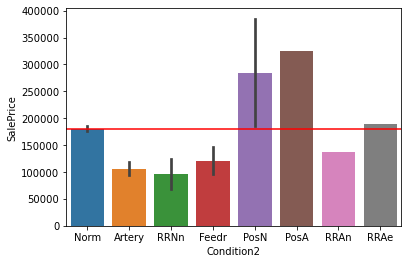

In [148]:
feature = 'Condition2'
# 시각화
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

In [149]:
data[feature].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [150]:
# 수치화
Norm = data.loc[data.Condition2 == 'Norm', target]
Feedr = data.loc[data.Condition2 == 'Feedr', target]
PosN = data.loc[data.Condition2 == 'PosN', target]
Artery = data.loc[data.Condition2 == 'Artery', target]
RRAe = data.loc[data.Condition2 == 'RRAe', target]
RRNn = data.loc[data.Condition2 == 'RRNn', target]
RRAn = data.loc[data.Condition2 == 'RRAn', target]
PosA = data.loc[data.Condition2 == 'PosA', target]
# RRNe = data.loc[data.Condition2 == 'RRNe', target]



spst.f_oneway(Norm,Feedr,Artery,RRAe,RRNn,RRAn,PosA)

F_onewayResult(statistic=1.843655914871547, pvalue=0.08729935530057274)

### BldgType --> Target *

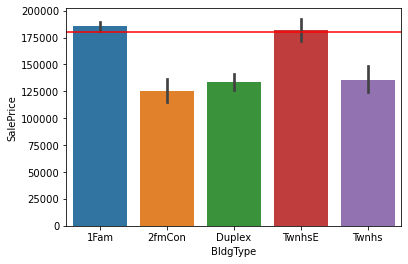

In [151]:
feature = 'BldgType'
# 시각화
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

In [152]:
data[feature].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [153]:
# 수치화
Fam = data.loc[data.BldgType == '1Fam', target]
fmCon = data.loc[data.BldgType == '2fmCon', target]
Duplex = data.loc[data.BldgType == 'Duplex', target]
TwnhsE = data.loc[data.BldgType == 'TwnhsE', target]
Twnhs = data.loc[data.BldgType == 'Twnhs', target]



spst.f_oneway(Fam,fmCon,Duplex,TwnhsE,Twnhs)

F_onewayResult(statistic=13.221803061162818, pvalue=1.3923766591790544e-10)

#### 추가분석_인사이트

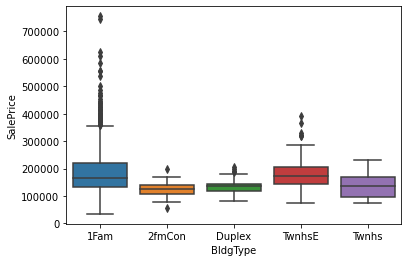

In [154]:
x = 'BldgType'
sns.boxplot(x=x,y=target,data=data)
plt.show()

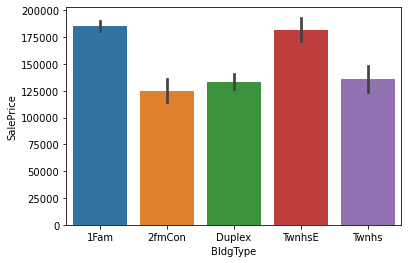

In [155]:
sns.barplot(x=x,y=target,data=data)
plt.show()

- 1Fam의 분포가 넓다. -> 데이터 양이 많아서
- 중위값은 다 비슷하니 데이터 양이 비슷했다면 평균도 비슷했을 수도

#### 추가분석_새기준(개선 실패)

In [156]:
# sig = 1가구
# mul = 다가구

# 수치화
sig = data.loc[data.BldgType == '1Fam', target]
mul = data.loc[data['BldgType'].isin(['2fmCon','Duplex','TwnhsE','Twnhs']),  target]

spst.ttest_ind(sig,mul)

Ttest_indResult(statistic=5.2891316524778045, pvalue=1.4171309693351657e-07)

### HouseStyle --> Target *

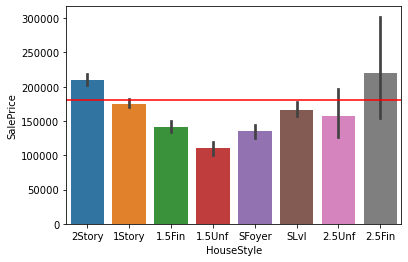

In [157]:
feature = 'HouseStyle'
# 시각화
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

In [158]:
data[feature].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [159]:
# 수치화
Story2 = data.loc[data.HouseStyle == '2Story', target]
Story1 = data.loc[data.HouseStyle == '1Story', target]
Fin15 = data.loc[data.HouseStyle == '1.5Fin', target]
Unf15 = data.loc[data.HouseStyle == '1.5Unf', target]
SFoyer = data.loc[data.HouseStyle == 'SFoyer', target]
SLvl = data.loc[data.HouseStyle == 'SLvl', target]
Unf25 = data.loc[data.HouseStyle == '2.5Unf', target]
Fin25 = data.loc[data.HouseStyle == '2.5Fin', target]



spst.f_oneway(Story2,Story1,Fin15,Unf15,SFoyer,SLvl,Unf25,Fin25)

F_onewayResult(statistic=20.216291057201907, pvalue=5.0389804226695897e-26)

#### 추가분석_인사이트

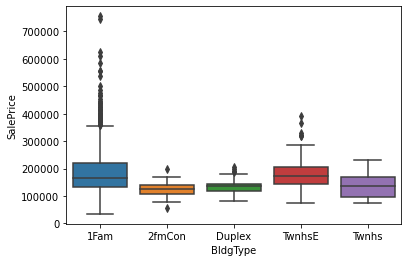

In [160]:
BldgTypex = 'HouseStyle'
sns.boxplot(x=x,y=target,data=data)
plt.show()

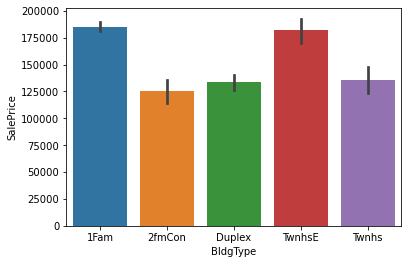

In [161]:
sns.barplot(x=x,y=target,data=data)
plt.show()

- 2.5층 미완성의 경우 분포가 매우 넓다. -> 데이터 양이 적어서 그런 것으로 추정
- 1story와 2stroy 빼고는 다 데이터가 적어서 1층과 다층 구조로 새열 만들고 열 삭제하는 게 나을 것으로 추정됨

#### 추가분석_새기준(개선)

In [162]:
# 시도1 : 개선
# 층별 구분 (sto1 =1층 / sto2 = 2층이상)

# 수치화
sto1 = data.loc[data['HouseStyle'].isin(['1Story','1.5Fin','1.5Unf']), target]
sto2 = data.loc[data['HouseStyle'].isin(['2Story','SFoyer','SLvl','2.5Unf','2.5Fin']), target]

spst.ttest_ind(sto1,sto2)


Ttest_indResult(statistic=-7.327669164170643, pvalue=3.8708197677086407e-13)

In [163]:
# 시도2 : 개선
# 층별 구분 (f1 =1층 / f2 = 2층이상 / unf = 미완) 

# 수치화
sto1 = data.loc[data['HouseStyle'].isin(['1Story','1.5Fin']), target]
sto2 = data.loc[data['HouseStyle'].isin(['2Story','SFoyer','SLvl','2.5Fin']), target]
undf= data.loc[data['HouseStyle'].isin(['2.5Unf','1.5Unf']), target]


spst.f_oneway(sto1,sto2,unf)


F_onewayResult(statistic=31.12240355095669, pvalue=5.851930499923667e-14)

#### 전처리_새 열 추가

In [164]:
# 전처리_새 열 생성
data['HouseStyle'].loc[data['HouseStyle'].isin(['1Story','1.5Fin'])] = 'sto1'
data['HouseStyle'].loc[data['HouseStyle'].isin(['2Story','SFoyer','SLvl','2.5Fin'])] = 'sto2'
data['HouseStyle'].loc[data['HouseStyle'].isin(['2.5Unf','1.5Unf'])] = 'unf'

# sto1 : 1층
# sto2  : 2층이상
# unf  : 미완성

In [165]:
data['HouseStyle'].unique()

array(['sto2', 'sto1', 'unf'], dtype=object)